In [6]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [31]:
import sys
import os

# Obtener la ruta actual del notebook
notebook_dir = os.getcwd()  # Esto da la ruta del directorio actual, que debería ser 'notebooks'

# Subir un nivel desde 'notebooks' y apuntar a la carpeta 'src'
src_dir = os.path.abspath(os.path.join(notebook_dir, '..', 'src'))

# Añadir el directorio 'src' al PYTHONPATH
sys.path.append(src_dir)

# Importar util.py
import util

In [22]:
final_pipeline = joblib.load('../final_pipeline.joblib')

In [47]:
data = pd.read_csv('../Car details v3.csv')

In [44]:
data.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0


In [42]:
final_columns = final_pipeline.named_steps['features'].named_steps['round_seats'].final_columns_

In [48]:
from sklearn.preprocessing import StandardScaler

# Separar la columna objetivo
objetivo = data['selling_price']

# Aplicar el logaritmo a la columna objetivo
objetivo_log = np.log1p(objetivo)  # Log(1 + selling_price)

# Aplicar StandardScaler
scaler = StandardScaler()
objetivo_log_scaled = scaler.fit_transform(objetivo_log.values.reshape(-1, 1))

# Convertir de nuevo a un DataFrame si es necesario
objetivo_log_scaled_df = pd.DataFrame(objetivo_log_scaled, columns=['selling_price_log_scaled'], index=data.index)

In [49]:
# Eliminar la columna objetivo del DataFrame original
data = data.drop('selling_price', axis=1)

# Aplicar las transformaciones preentrenadas
data_transform = final_pipeline.transform(data)

# Convertir data_transform de nuevo a un DataFrame
data_transform_df = pd.DataFrame(data_transform, columns=final_columns)

# Concatenar la columna objetivo nuevamente
data_final = pd.concat([data_transform_df, objetivo_log_scaled_df.reset_index(drop=True)], axis=1)

c:\Users\Iñaki\Desktop\Master inteligencia artificial\Machine Learning 1\trabajo final\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [50]:
data_final 

,year,km_driven,owner,seats,engine_cc,max_power_bhp,mileage_kmpl,torque_peak_power,torque_peak_speed,fuel_Diesel,...,make_Mitsubishi,make_Nissan,make_Opel,make_Renault,make_Skoda,make_Tata,make_Toyota,make_Volkswagen,make_Volvo,selling_price_log_scaled
0,0.053108,1.261329,-0.643569,-0.432336,-0.423473,-0.484996,0.936521,0.085768,-1.152962,0.912577,...,-0.041963,-0.100602,-0.013259,-0.169016,-0.109989,-0.317175,-0.252512,-0.155906,-0.093209,0.051954
1,0.053108,0.833638,0.753326,-0.432336,0.080465,0.355634,0.400453,0.628153,-0.615436,0.912577,...,-0.041963,-0.100602,-0.013259,-0.169016,9.091852,-0.317175,-0.252512,-0.155906,-0.093209,-0.181331
2,-1.931351,1.169081,2.150221,-0.432336,0.078449,-0.371089,-0.415509,-0.505550,-0.400425,-1.095798,...,-0.041963,-0.100602,-0.013259,-0.169016,-0.109989,-0.317175,-0.252512,-0.155906,-0.093209,-1.195423
3,-0.939121,0.951043,-0.643569,-0.432336,-0.125142,-0.029370,0.841641,0.354646,-0.346673,0.912577,...,-0.041963,-0.100602,-0.013259,-0.169016,-0.109989,-0.317175,-0.252512,-0.155906,-0.093209,-0.774124
4,-1.683294,0.833638,-0.643569,-0.432336,-0.322685,-0.080628,-0.795026,-0.611966,1.534670,-1.095798,...,-0.041963,-0.100602,-0.013259,-0.169016,-0.109989,-0.317175,-0.252512,-0.155906,-0.093209,-1.427891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,-0.194949,0.665916,-0.643569,-0.432336,-0.526276,-0.232978,-0.225750,-0.603966,0.997144,-1.095798,...,-0.041963,-0.100602,-0.013259,-0.169016,-0.109989,-0.317175,-0.252512,-0.155906,-0.093209,-0.354355
8124,-1.683294,0.816866,3.547116,-0.432336,0.070386,0.540163,-0.628987,0.496535,-0.346673,0.912577,...,-0.041963,-0.100602,-0.013259,-0.169016,-0.109989,-0.317175,-0.252512,-0.155906,-0.093209,-1.382913
8125,-1.187179,0.833638,-0.643569,-0.432336,-0.423473,-0.487844,-0.035992,0.085768,-1.152962,0.912577,...,-0.041963,-0.100602,-0.013259,-0.169016,-0.109989,-0.317175,-0.252512,-0.155906,-0.093209,-0.143292
8126,-0.194949,-0.759720,-0.643569,-0.432336,-0.125142,-0.598902,0.976844,-0.366220,-0.077909,0.912577,...,-0.041963,-0.100602,-0.013259,-0.169016,-0.109989,3.152838,-0.252512,-0.155906,-0.093209,-0.471674


In [61]:
# 1. Función para aplicar DBSCAN con diferentes parámetros
def apply_dbscan(X, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)
    return labels

# 2. Función para visualizar resultados (outliers vs. no outliers)
def plot_clusters(X_2d, labels, title):
    plt.figure(figsize=(12, 8))
    is_outlier = labels == -1
    plt.scatter(X_2d[~is_outlier, 0], X_2d[~is_outlier, 1], c='blue', label='Clusters', alpha=0.6)
    plt.scatter(X_2d[is_outlier, 0], X_2d[is_outlier, 1], c='red', label='Outliers', alpha=0.6)
    plt.title(title)
    plt.legend()
    
    # Añadir información sobre la proporción de outliers
    n_outliers = np.sum(is_outlier)
    outlier_percentage = (n_outliers / len(labels)) * 100
    plt.annotate(f'Outliers: {n_outliers} ({outlier_percentage:.2f}%)', 
                 xy=(0.05, 0.95), xycoords='axes fraction',
                 fontsize=10, ha='left', va='top')
    
    plt.show()


# 4. Probar diferentes parámetros de DBSCAN
eps_values = [2, 3.5, 5]
min_samples_values = [5, 10, 15]

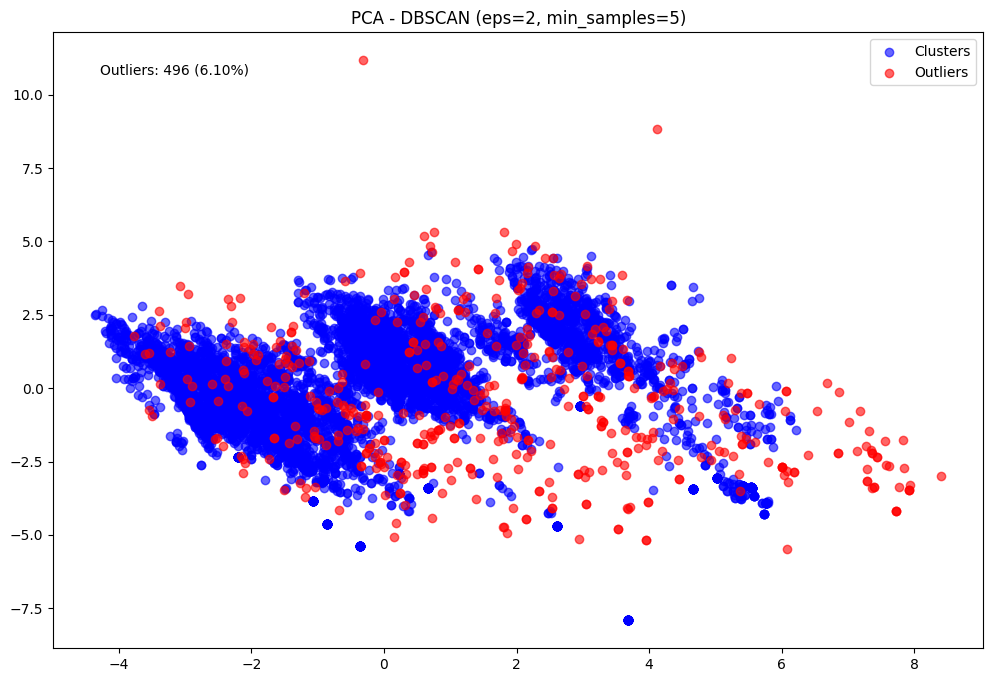

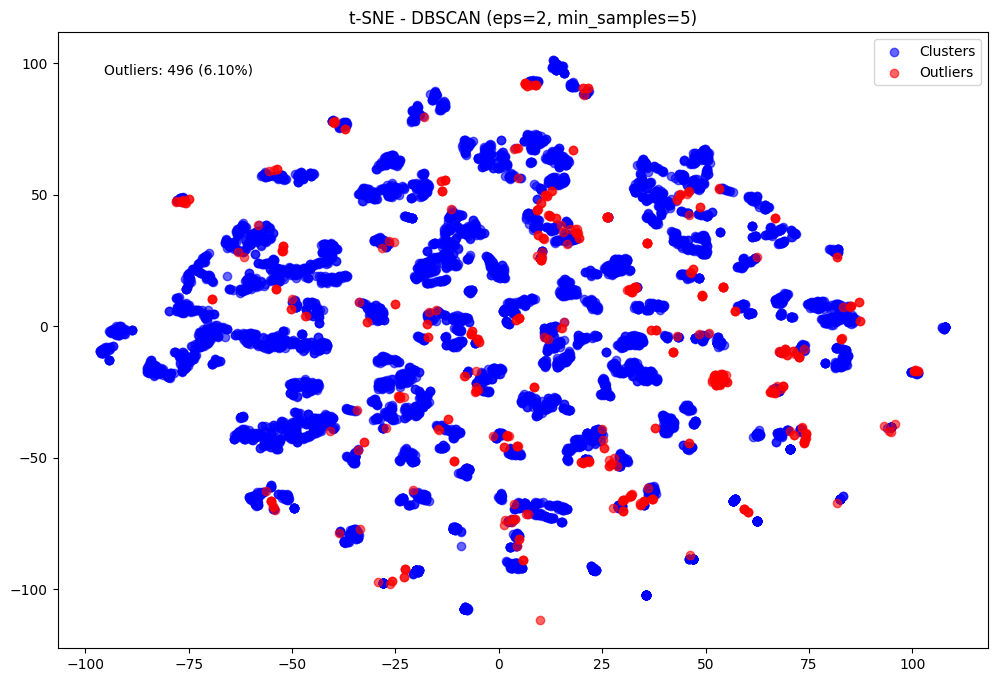

eps=2, min_samples=5:
  Número de clusters: 108
  Número de outliers: 496 (6.10%)



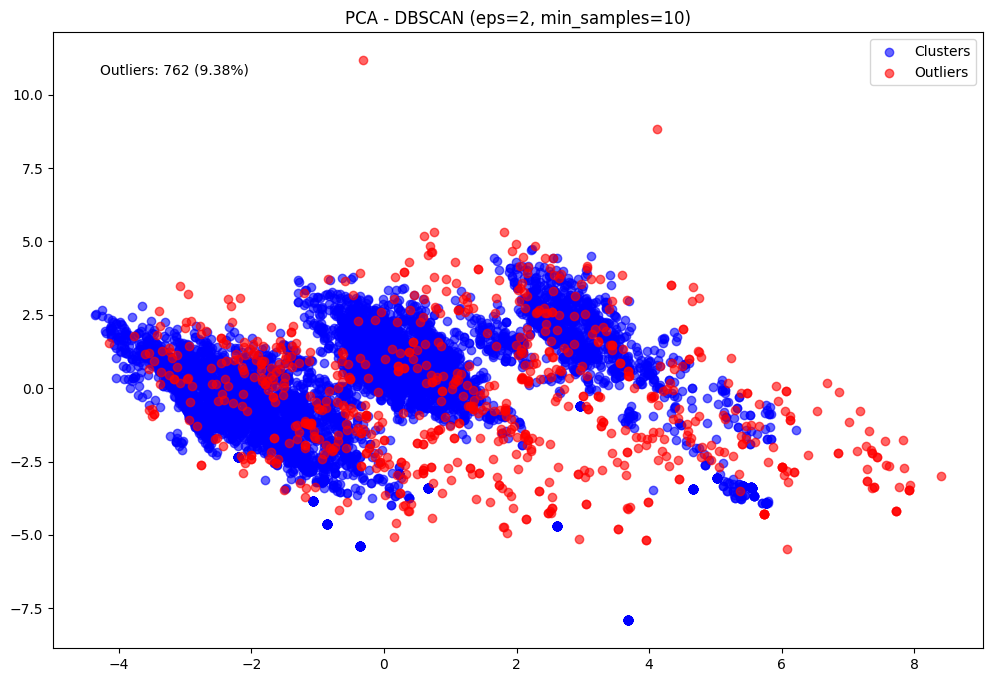

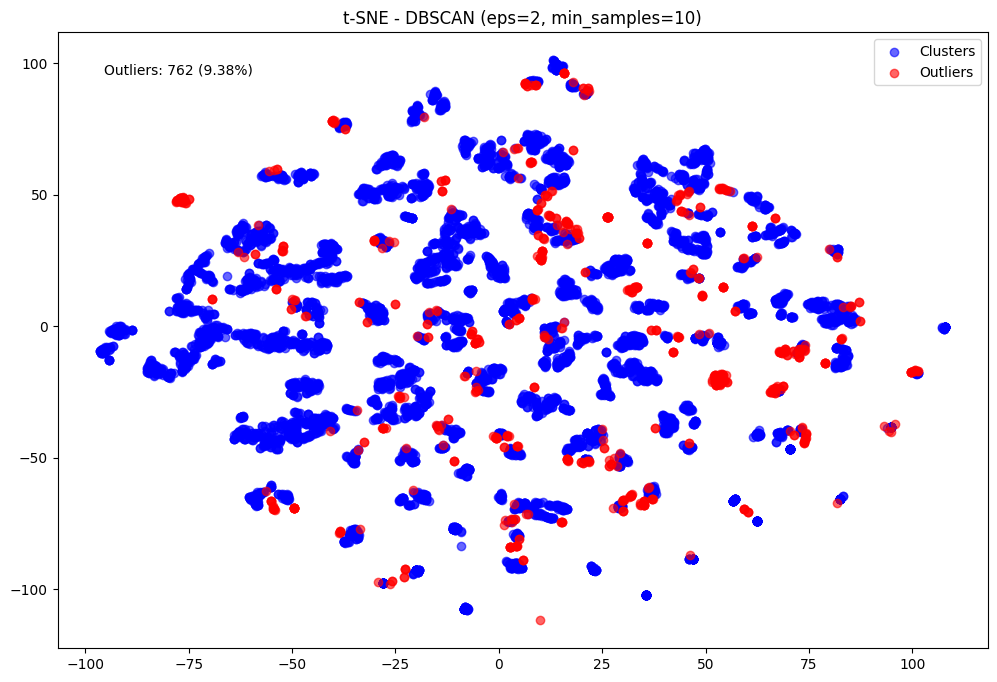

eps=2, min_samples=10:
  Número de clusters: 80
  Número de outliers: 762 (9.38%)



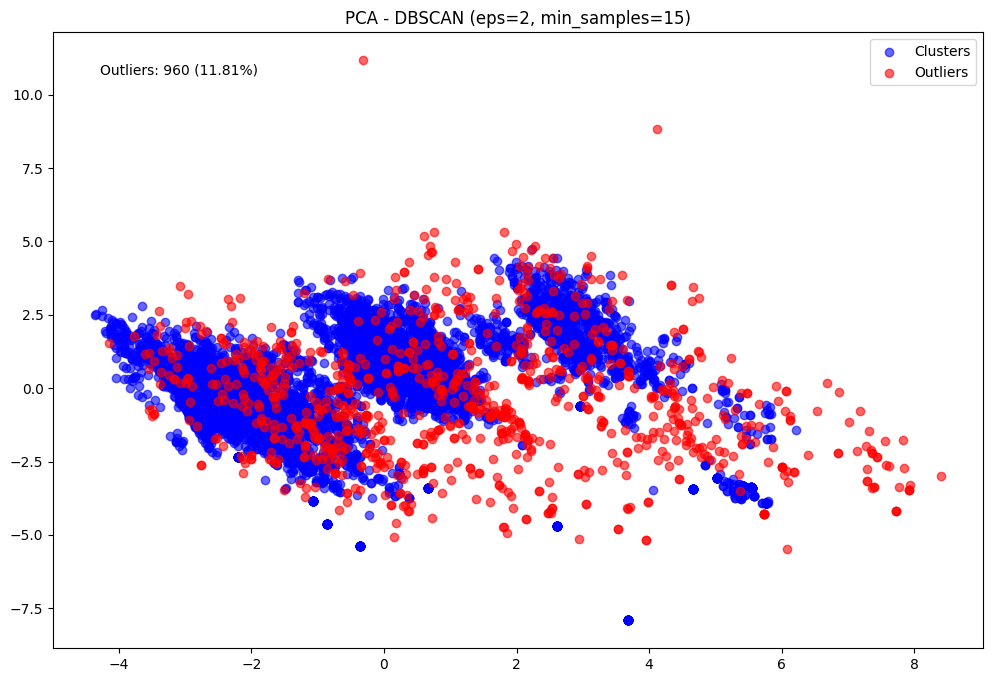

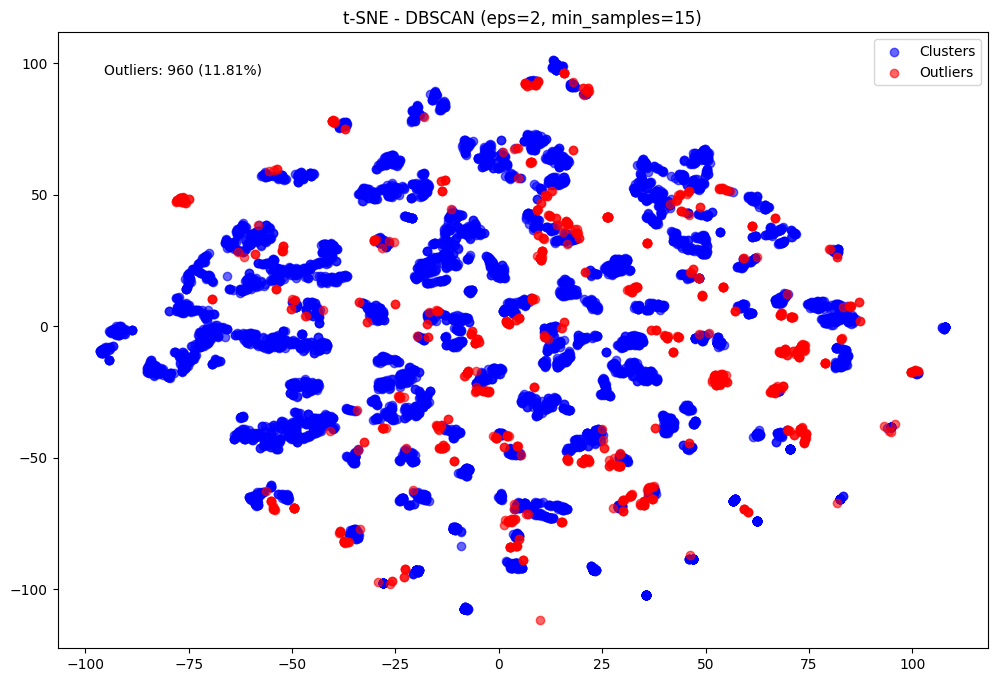

eps=2, min_samples=15:
  Número de clusters: 66
  Número de outliers: 960 (11.81%)



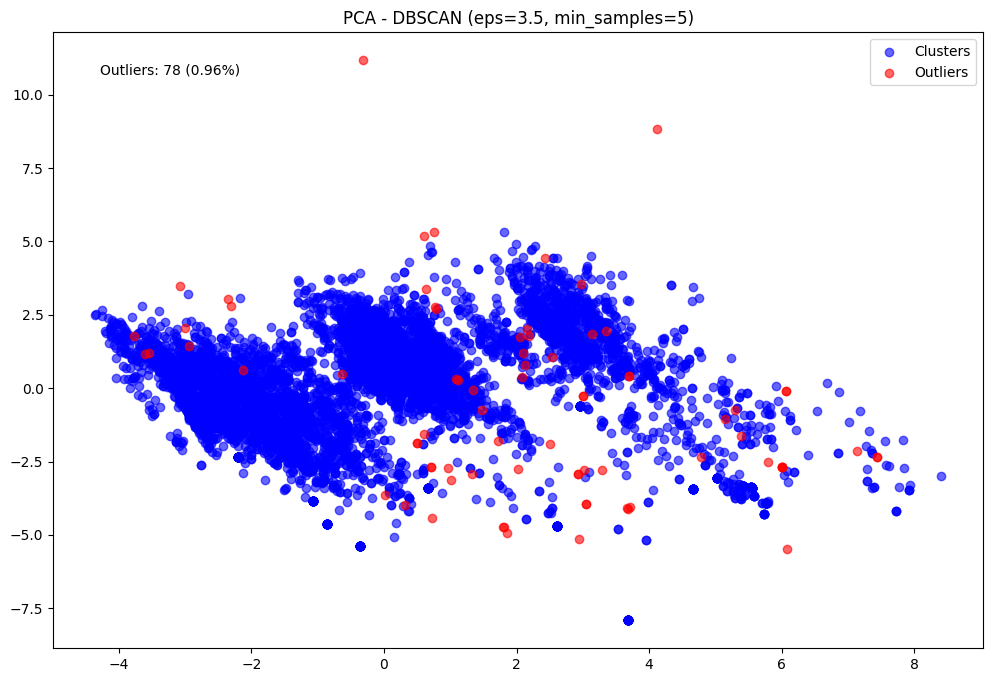

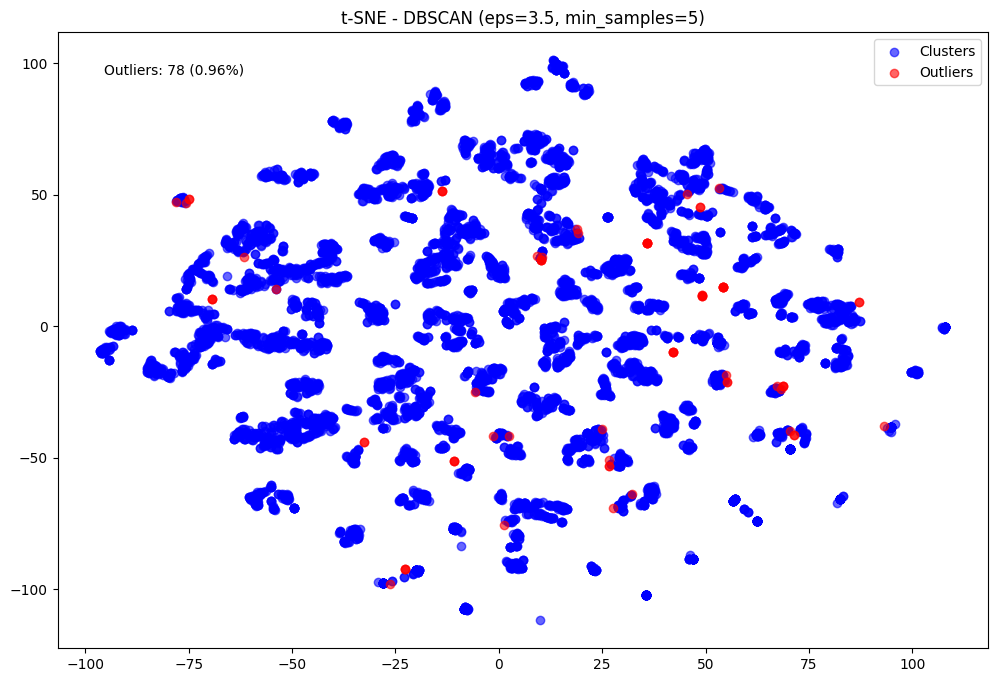

eps=3.5, min_samples=5:
  Número de clusters: 40
  Número de outliers: 78 (0.96%)



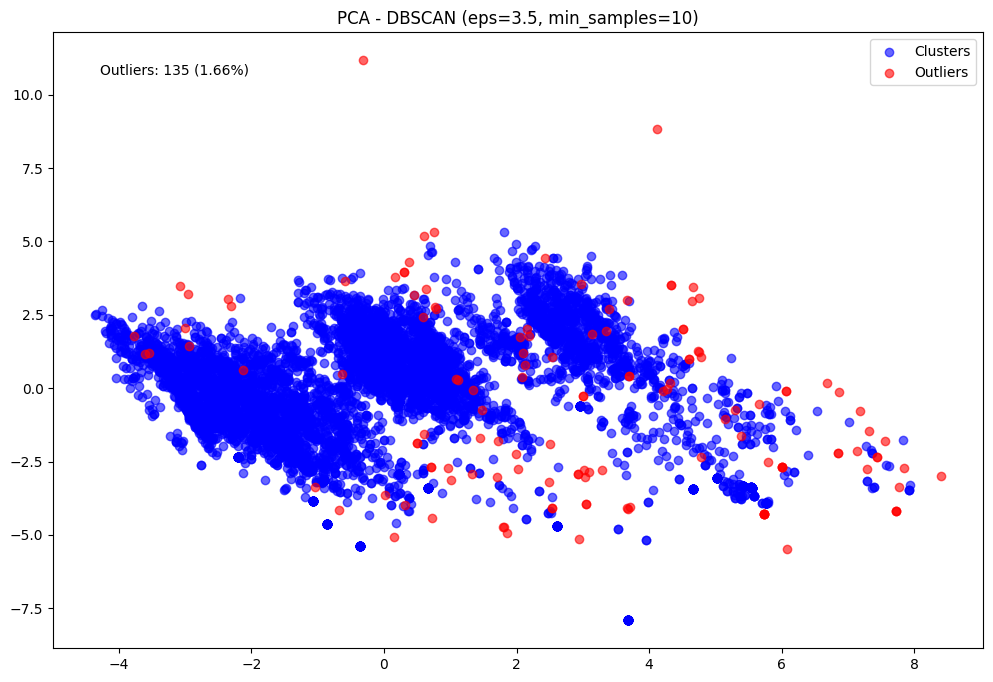

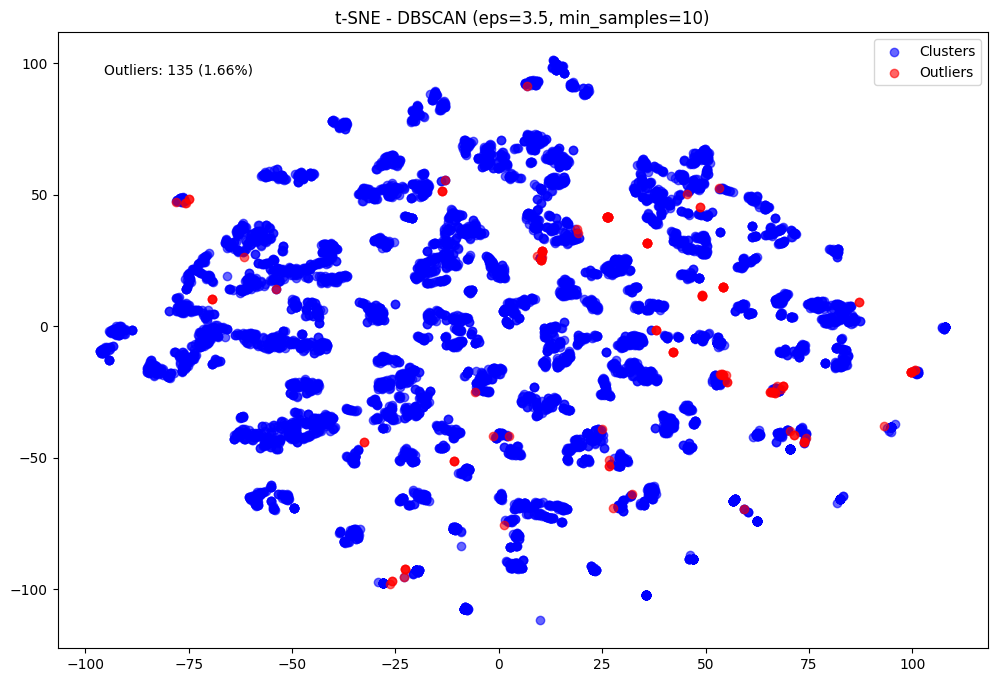

eps=3.5, min_samples=10:
  Número de clusters: 34
  Número de outliers: 135 (1.66%)



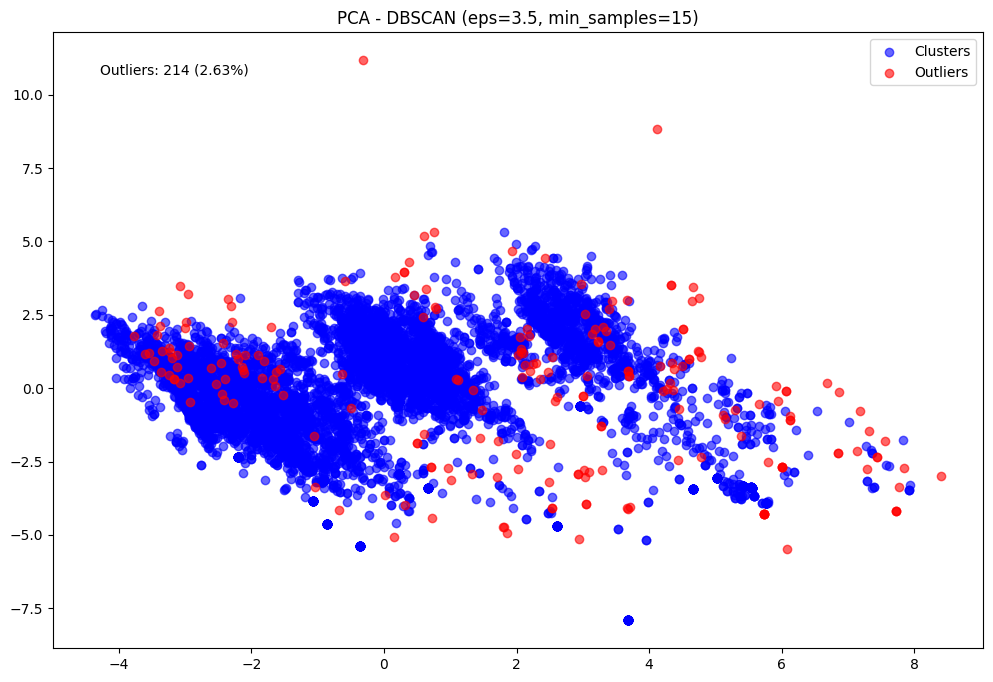

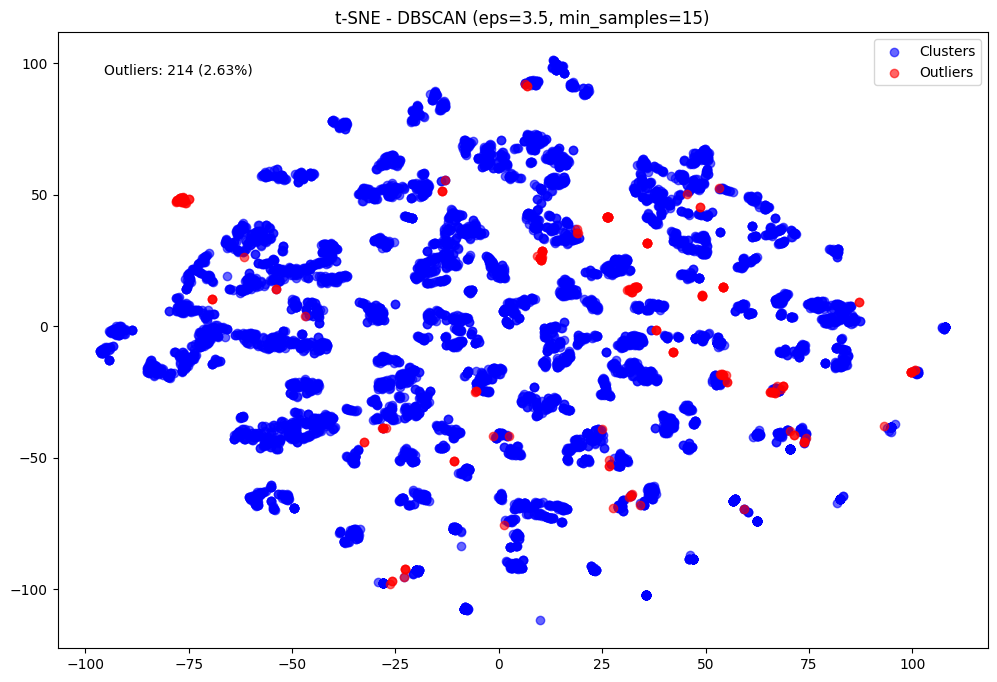

eps=3.5, min_samples=15:
  Número de clusters: 30
  Número de outliers: 214 (2.63%)



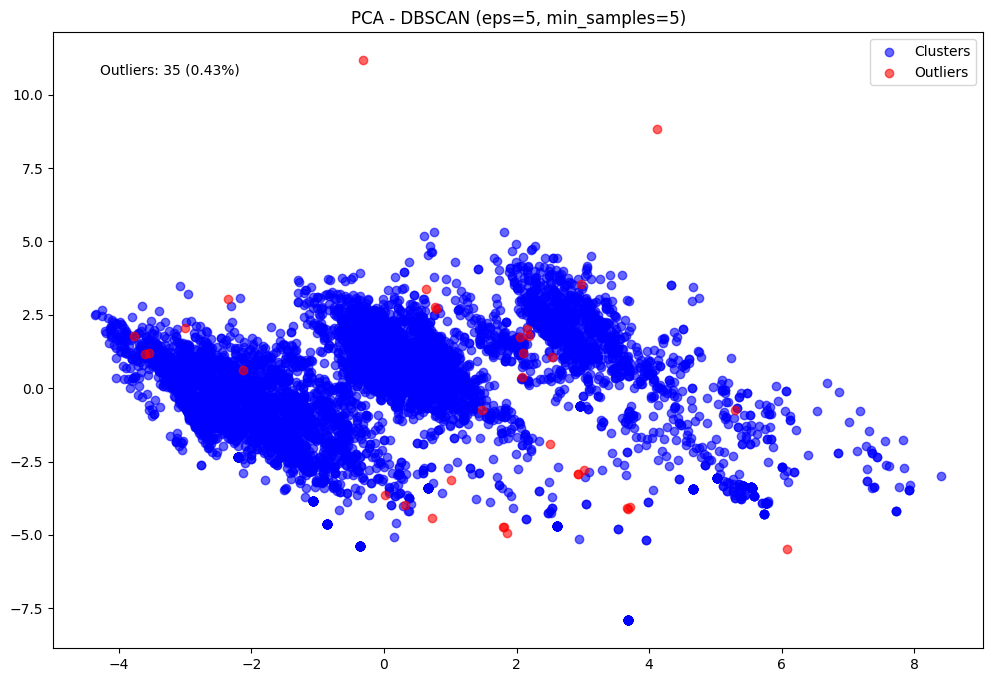

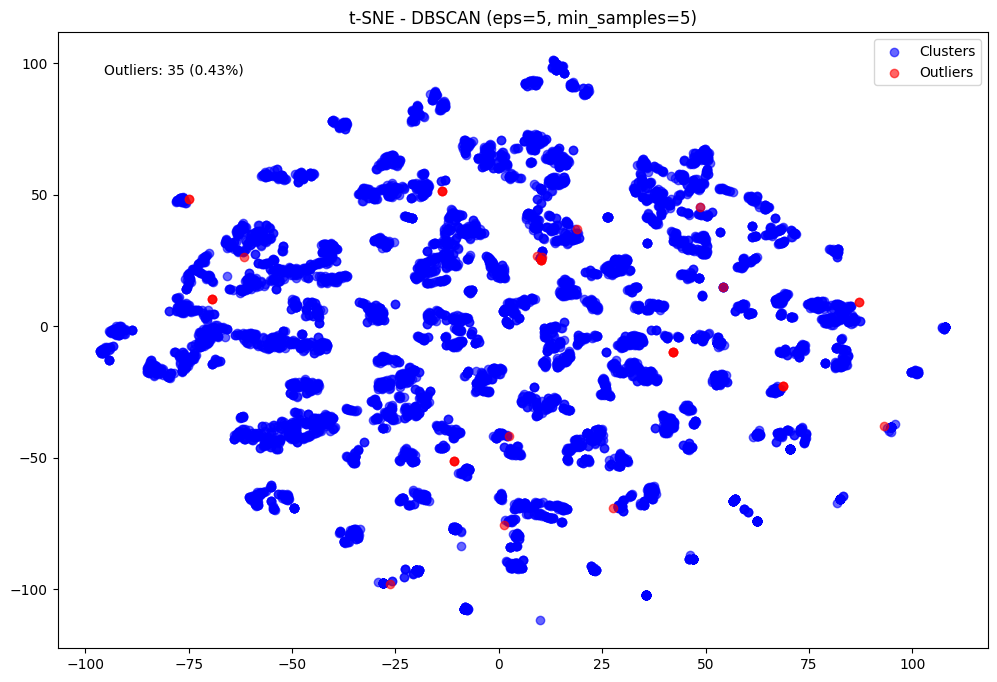

eps=5, min_samples=5:
  Número de clusters: 24
  Número de outliers: 35 (0.43%)



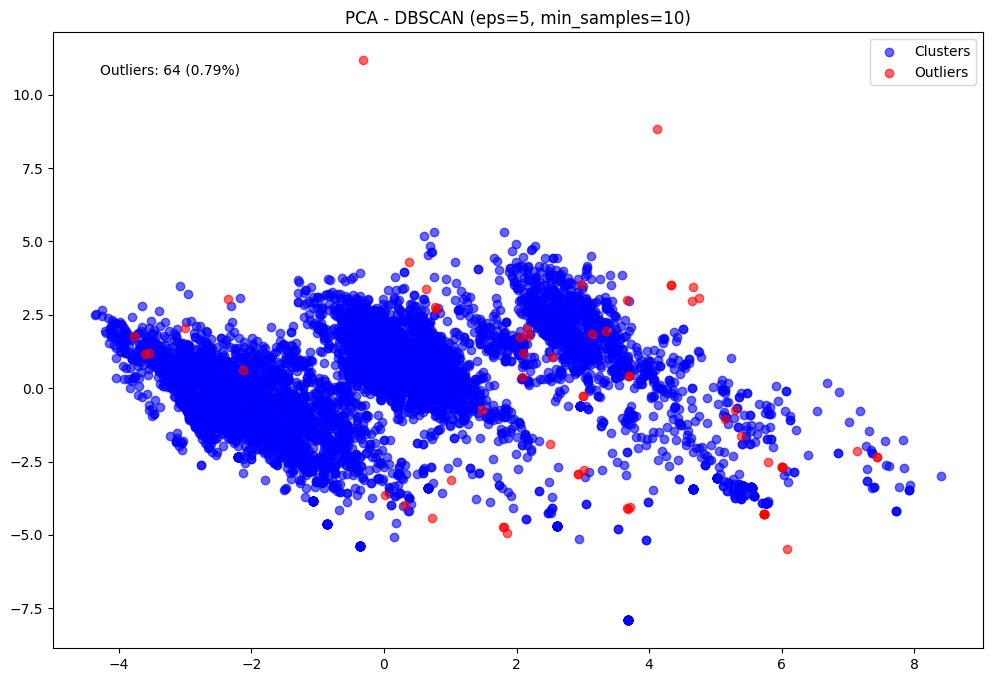

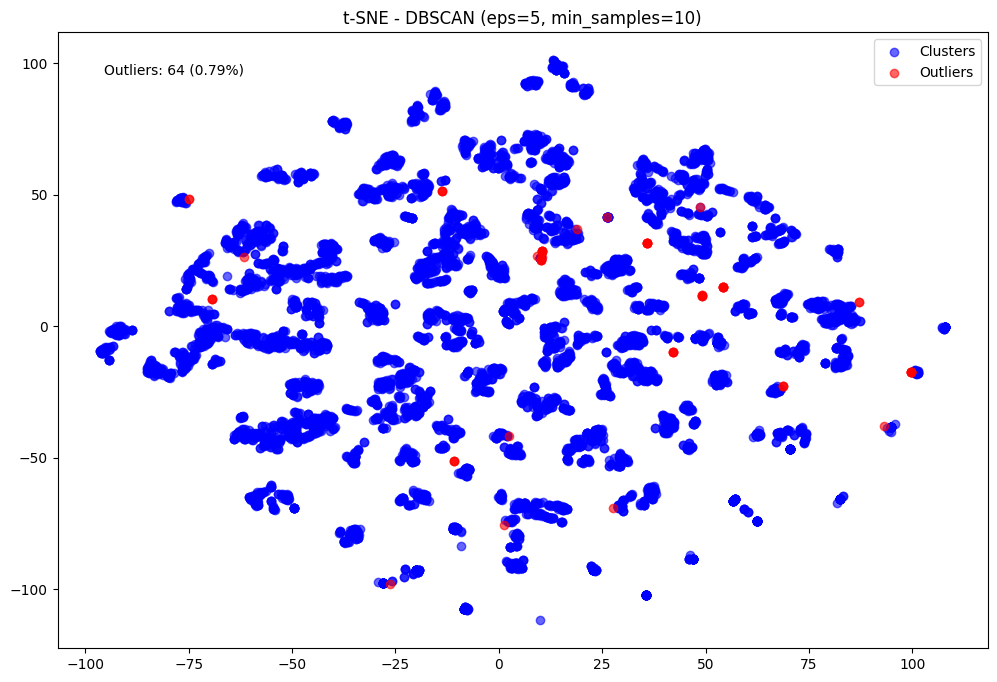

eps=5, min_samples=10:
  Número de clusters: 19
  Número de outliers: 64 (0.79%)



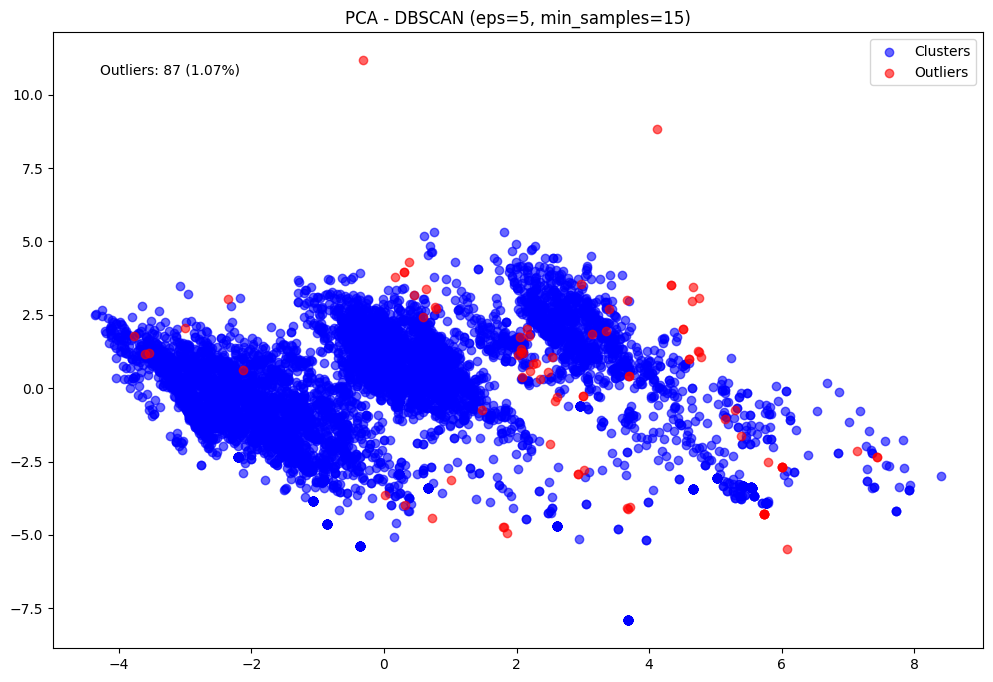

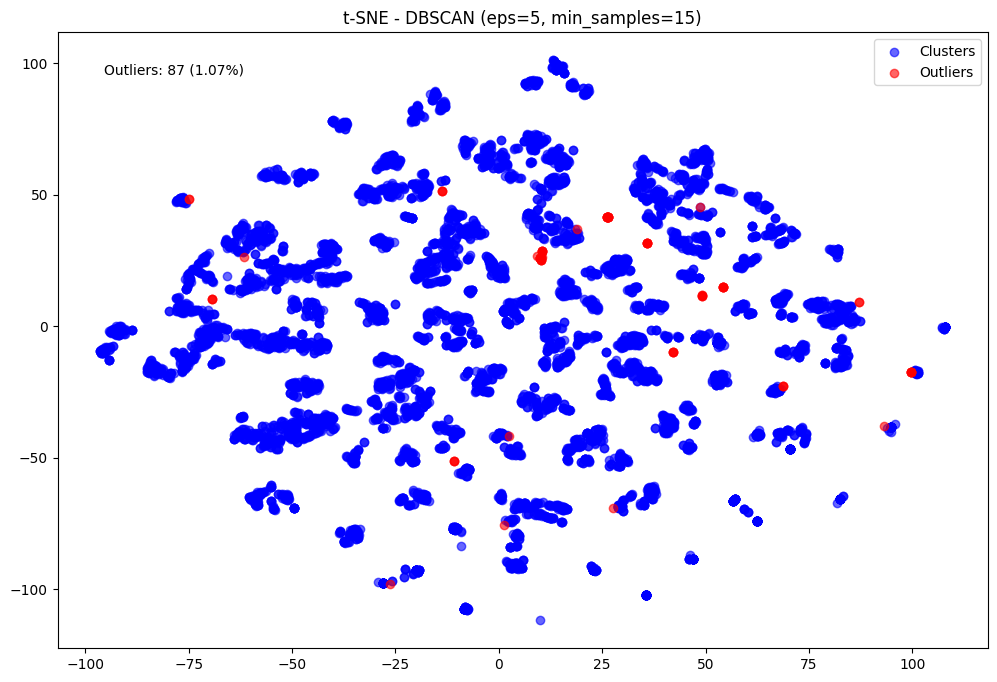

eps=5, min_samples=15:
  Número de clusters: 17
  Número de outliers: 87 (1.07%)



In [62]:
for eps in eps_values:
    for min_samples in min_samples_values:
        labels = apply_dbscan(data_final, eps, min_samples)
        
        # Visualizar con PCA
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(data_final)
        plot_clusters(X_pca, labels, f'PCA - DBSCAN (eps={eps}, min_samples={min_samples})')
        
        # Visualizar con t-SNE
        tsne = TSNE(n_components=2, random_state=42)
        X_tsne = tsne.fit_transform(data_final)
        plot_clusters(X_tsne, labels, f't-SNE - DBSCAN (eps={eps}, min_samples={min_samples})')
        
        # Imprimir estadísticas
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_outliers = list(labels).count(-1)
        print(f'eps={eps}, min_samples={min_samples}:')
        print(f'  Número de clusters: {n_clusters}')
        print(f'  Número de outliers: {n_outliers} ({n_outliers/len(labels):.2%})')
        print()

# Explicación del bucle de análisis DBSCAN

En nuestro código, creamos un bucle que hace lo siguiente:

1. **Prueba diferentes configuraciones**: 
   Probamos varias combinaciones de dos parámetros importantes para DBSCAN: 'eps' y 'min_samples'. 
   - 'eps' es como el "radio de vecindad" para cada punto.
   - 'min_samples' es cuántos vecinos necesita un punto para formar parte de un grupo.

2. **Para cada configuración, hacemos lo siguiente**:

   a. **Aplicamos DBSCAN**: 
      - Esto agrupa nuestros datos y etiqueta los puntos que no encajan en ningún grupo como outliers.

   b. **Visualizamos los resultados usando PCA**:
      - PCA nos ayuda a ver nuestros datos en 2D, mostrando las direcciones más importantes de variación.
      - Dibujamos un gráfico donde los puntos azules son grupos normales y los rojos son outliers.

   c. **Visualizamos los resultados usando t-SNE**:
      - t-SNE es otra forma de ver nuestros datos en 2D, que es buena para mostrar grupos complejos.
      - Igual que antes, azul para grupos normales, rojo para outliers.

   d. **Mostramos estadísticas**:
      - Imprimimos cuántos grupos encontramos y cuántos outliers hay.

3. **¿Qué buscamos en estos gráficos?**
   - Queremos ver si los outliers (puntos rojos) están claramente separados de los grupos normales (puntos azules).
   - Buscamos una configuración donde tengamos un número razonable de outliers, ni muy pocos ni demasiados.

4. **¿Por qué usamos tanto PCA como t-SNE?**
   - PCA nos da una vista "global" de nuestros datos.
   - t-SNE es mejor para ver estructuras locales y grupos complejos.
   - Usar ambos nos da una visión más completa de nuestros datos y outliers.

5. **Decisión final**:
   - Después de ver todos estos gráficos, podemos elegir la configuración que mejor separa los outliers de los datos normales.
   - Esta configuración nos ayudará a identificar los outliers más interesantes o importantes en nuestro conjunto de datos.

In [57]:
from hdbscan import HDBSCAN

In [58]:
# Aplicar HDBSCAN
clusterer = HDBSCAN(min_cluster_size=5, min_samples=5)
labels = clusterer.fit_predict(data_final)

# Calcular porcentaje de outliers
outlier_percentage = np.sum(labels == -1) / len(labels) * 100
print(f"Porcentaje de outliers: {outlier_percentage:.2f}%")

Porcentaje de outliers: 19.53%
